In [1]:
#Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

In [2]:
Cocacola=pd.read_csv("CocaCola_Sales_Rawdata.csv")
Cocacola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


<AxesSubplot:>

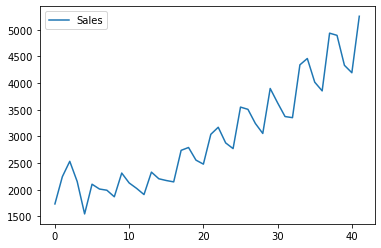

In [3]:
Cocacola.plot()

In [4]:
import warnings
warnings.filterwarnings("ignore")
Cocacola["quarter"]=0
for i in range(42):
    a=Cocacola["Quarter"][i]
    Cocacola["quarter"][i]=a[0:2]

In [5]:
Cocacola

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


In [6]:
Cocacola.quarter.value_counts()

Q1    11
Q2    11
Q3    10
Q4    10
Name: quarter, dtype: int64

<AxesSubplot:xlabel='quarter', ylabel='count'>

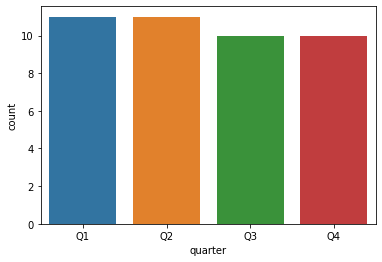

In [7]:
sns.countplot(x="quarter",data=Cocacola)

In [8]:
Cocacola_dummies=pd.DataFrame(pd.get_dummies(Cocacola["quarter"]),columns=["Q1","Q2","Q3","Q4"])
Cc_dummies=pd.concat([Cocacola,Cocacola_dummies],axis=1)

In [9]:
Cc_dummies

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [10]:
Cc_dummies["t"]=np.arange(1,43)
Cc_dummies["t_squared"]=Cc_dummies["t"]**2
Cc_dummies["Sales_log"]=np.log(Cocacola["Sales"])

In [11]:
Cc_dummies.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,Sales_log
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


In [12]:
Cc_dummies.columns

Index(['Quarter', 'Sales', 'quarter', 'Q1', 'Q2', 'Q3', 'Q4', 't', 't_squared',
       'Sales_log'],
      dtype='object')

In [13]:
Cc_dummies.corr()

,Sales,Q1,Q2,Q3,Q4,t,t_squared,Sales_log
Sales,1.000000,-0.225213,0.213823,0.080847,-0.069089,0.919252,0.948837,0.988586
Q1,-0.225213,1.000000,-0.354839,-0.332997,-0.332997,-0.024573,-0.009051,-0.247466
Q2,0.213823,-0.354839,1.000000,-0.332997,-0.332997,0.024573,0.038605,0.205380
Q3,0.080847,-0.332997,-0.332997,1.000000,-0.312500,-0.023060,-0.037616,0.092462
Q4,-0.069089,-0.332997,-0.332997,-0.312500,1.000000,0.023060,0.007107,-0.049018
t,0.919252,-0.024573,0.024573,-0.023060,0.023060,1.000000,0.969706,0.929997
t_squared,0.948837,-0.009051,0.038605,-0.037616,0.007107,0.969706,1.000000,0.935557
Sales_log,0.988586,-0.247466,0.205380,0.092462,-0.049018,0.929997,0.935557,1.000000


<AxesSubplot:>

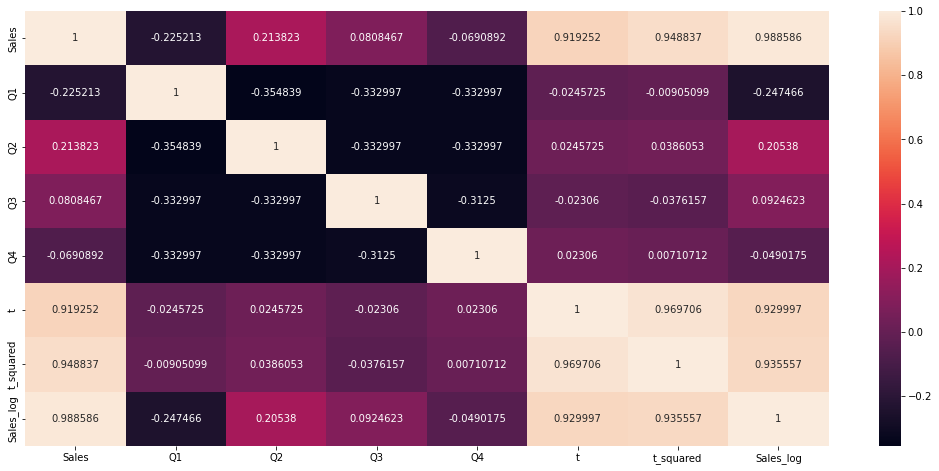

In [14]:
fig=plt.figure(figsize=(18,8))
sns.heatmap(Cc_dummies.corr(),annot=True,fmt="g") #fmt is format of the grid values

<AxesSubplot:xlabel='quarter', ylabel='Sales'>

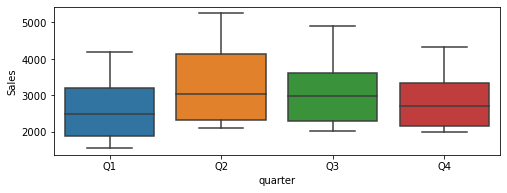

In [15]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="quarter",y="Sales",data=Cocacola)

<AxesSubplot:xlabel='quarter', ylabel='Sales'>

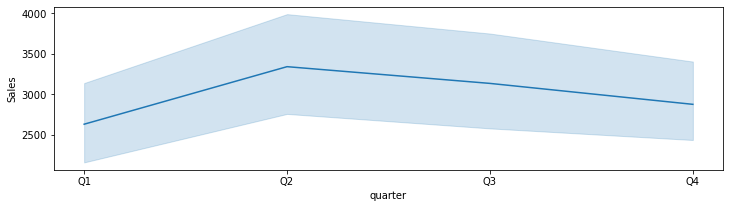

In [16]:
plt.figure(figsize=(12,3))
sns.lineplot(x="quarter",y="Sales",data=Cocacola) 

# MODEL BUILDING

In [17]:
Train = Cc_dummies.head(30)
Test = Cc_dummies.tail(12) 

In [18]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2)) 
rmse_linear

714.0144483818335

In [19]:
#Exponential

Exp = smf.ols('Sales_log~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp 

552.2821039688208

In [20]:
#Quadratic 

Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad 

646.2715428655371

In [21]:
#Additive seasonality 

add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[["Q1","Q2","Q3","Q4"]]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1778.0065467723998

In [22]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','Q4','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 

586.0533068427089

In [23]:
##Multiplicative Seasonality

Mul_sea = smf.ols('Sales_log~Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea 

1828.923891189183

In [24]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('Sales_log~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea  

410.2497060538072

In [25]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values']) 

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,410.249706
1,rmse_Exp,552.282104
4,rmse_add_sea_quad,586.053307
2,rmse_Quad,646.271543
0,rmse_linear,714.014448
3,rmse_add_sea,1778.006547
5,rmse_Mult_sea,1828.923891


# ARIMA MODEL

In [26]:
data=pd.read_csv("CocaCola_Sales_Rawdata.csv",header=0,index_col=0)
data

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


In [27]:
#Separate out the validation dataset
split_point=len(data)-7
df_Cocacola, Validation_Cocacola=data[0:split_point],data[split_point:]
print("df_Cocacola %d,  Validation_Cocacola %d" % (len(df_Cocacola),len( Validation_Cocacola)))

df_Cocacola 35,  Validation_Cocacola 7


In [28]:
df_Cocacola.to_csv("df_Cocacola.csv",header=False)
Validation_Cocacola.to_csv("Validation_Cocacola.csv",header=False)

In [29]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt

In [30]:
import warnings
warnings.filterwarnings("ignore")
train=read_csv("df_Cocacola.csv",header=None,index_col=0,parse_dates=True,squeeze=True)
train

0
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Q2_87    2104.411995
Q3_87    2014.362999
Q4_87    1991.746998
Q1_88    1869.049999
Q2_88    2313.631996
Q3_88    2128.320000
Q4_88    2026.828999
Q1_89    1910.603996
Q2_89    2331.164993
Q3_89    2206.549995
Q4_89    2173.967995
Q1_90    2148.278000
Q2_90    2739.307999
Q3_90    2792.753998
Q4_90    2556.009995
Q1_91    2480.973999
Q2_91    3039.522995
Q3_91    3172.115997
Q4_91    2879.000999
Q1_92    2772.000000
Q2_92    3550.000000
Q3_92    3508.000000
Q4_92    3243.859993
Q1_93    3056.000000
Q2_93    3899.000000
Q3_93    3629.000000
Q4_93    3373.000000
Q1_94    3352.000000
Q2_94    4342.000000
Q3_94    4461.000000
Name: 1, dtype: float64

In [31]:
X=train.values
train_size=int(len(X)*0.50)
train, test=X[0:train_size],X[train_size:]

In [32]:
train, test

(array([1734.827   , 2244.960999, 2533.804993, 2154.962997, 1547.818996,
        2104.411995, 2014.362999, 1991.746998, 1869.049999, 2313.631996,
        2128.32    , 2026.828999, 1910.603996, 2331.164993, 2206.549995,
        2173.967995, 2148.278   ]),
 array([2739.307999, 2792.753998, 2556.009995, 2480.973999, 3039.522995,
        3172.115997, 2879.000999, 2772.      , 3550.      , 3508.      ,
        3243.859993, 3056.      , 3899.      , 3629.      , 3373.      ,
        3352.      , 4342.      , 4461.      ]))

# VALIDATION

In [33]:
history=[x for x in train]
predictions=list()
for i in range (len(test)):
    yhat=history[-1]
    predictions.append(yhat)
    obs=test[i]
    history.append(obs)
    print(">predicted=%.3f, expected=%.3f" % (yhat,obs))

>predicted=2148.278, expected=2739.308
>predicted=2739.308, expected=2792.754
>predicted=2792.754, expected=2556.010
>predicted=2556.010, expected=2480.974
>predicted=2480.974, expected=3039.523
>predicted=3039.523, expected=3172.116
>predicted=3172.116, expected=2879.001
>predicted=2879.001, expected=2772.000
>predicted=2772.000, expected=3550.000
>predicted=3550.000, expected=3508.000
>predicted=3508.000, expected=3243.860
>predicted=3243.860, expected=3056.000
>predicted=3056.000, expected=3899.000
>predicted=3899.000, expected=3629.000
>predicted=3629.000, expected=3373.000
>predicted=3373.000, expected=3352.000
>predicted=3352.000, expected=4342.000
>predicted=4342.000, expected=4461.000


In [34]:
rmse_arima=sqrt(mean_squared_error(test,predictions))
#print("RMSE: %.3F" % rmse)
rmse_arima

434.40066499070895

In [35]:

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea","RMSE_ARIMA"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea,rmse_arima])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values']) 

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,410.249706
7,RMSE_ARIMA,434.400665
1,rmse_Exp,552.282104
4,rmse_add_sea_quad,586.053307
2,rmse_Quad,646.271543
0,rmse_linear,714.014448
3,rmse_add_sea,1778.006547
5,rmse_Mult_sea,1828.923891


In [36]:
##Multiplicative Additive Seasonality has low rmse value, So it is considered as most preferred value